<Axes: xlabel='PCA1', ylabel='PCA2'>

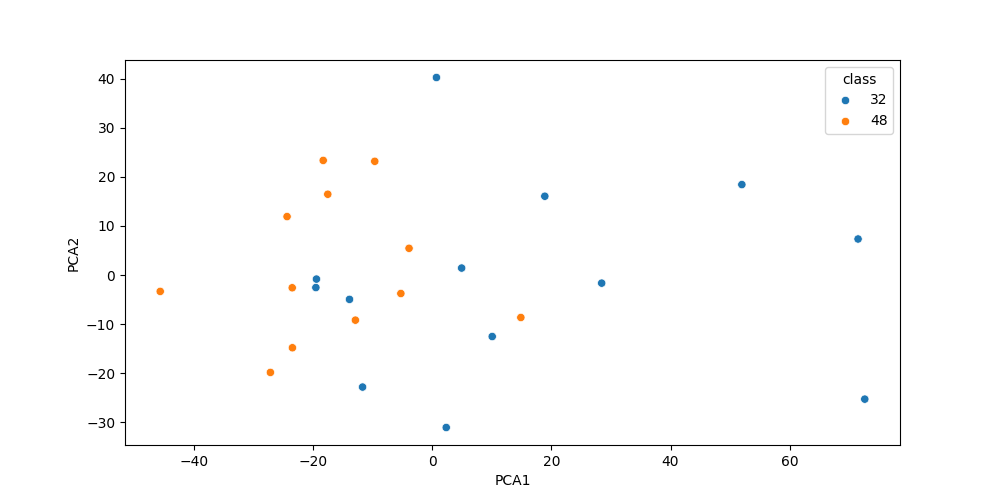

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib widget
tp32 = pd.read_csv("compiled_spectral_data/tp_extract_32.csv")
tp48 = pd.read_csv("compiled_spectral_data/tp_extract_48.csv")

wavenumber = pd.read_csv("compiled_spectral_data/wavenumber.csv",header=0)

tp32T = tp32.T.reset_index(drop=True)
tp48T = tp48.T.reset_index(drop=True)

tp32T.columns = wavenumber['wavenumber']
tp48T.columns = wavenumber['wavenumber']

tp32T['class'] = '32'
tp48T['class'] = '48'

main_df = pd.concat([tp32T, tp48T], axis=0, ignore_index=True)
main_df.columns.name = None

pca = PCA(n_components=2)
scaler = StandardScaler()
y = main_df.pop('class')
X = main_df
X = scaler.fit_transform(X)


pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

pca_plot, axis = plt.subplots(1,1, figsize=(10,5))

sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'], hue=y.astype(str), palette='tab10', marker='o')